# Analysis

> Use NLP to sort the entries in the 'Other Interests' column into the following categories: 'Archaeology/Anthropology', 'Religious Studies', 'Family History', 'Local History', 'Social Studies'. Ignore NaN values. Replace the Other Interests column with the categories as boolean columns.

In [165]:
# First, let's load the data and inspect the first few rows
import pandas as pd

data = pd.read_csv('cleaned.csv')
data

,id,city,region,country_name,latitude,longitude,Genealogical researcher,GLAM professional,Government employee,Legal researcher,...,Health,History,Indigenous Land Claims,Indigenous Studies,Information Science,Law,Linguistics,Literature,Political Science,Other Interest
0,118513304578,Rochester,Minnesota,US,44.0496,-92.4896,0,0,0,0,...,0,0,0,0,0,0,0,0,0,somg
1,118513304039,Oshawa,Ontario,CA,43.9001,-78.8496,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,118513279901,Saint-Eustache,Quebec,CA,45.5650,-73.9055,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,118513272844,Halifax,Nova Scotia,CA,44.6427,-63.5769,0,0,0,0,...,0,1,0,0,0,0,0,0,0,marketing
4,118513261195,Ottawa,Ontario,CA,45.4112,-75.6981,0,0,0,0,...,0,0,1,1,0,1,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,118476456439,Milan,Lombardy,IT,45.4643,9.1895,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
2943,118476453543,Kentville,Nova Scotia,CA,45.0771,-64.4960,1,0,0,0,...,0,1,0,0,0,0,0,0,0,NaN
2944,118476452006,Winnipeg,Manitoba,CA,49.9413,-97.0571,0,0,0,0,...,0,0,0,0,0,0,0,0,0,engineering
2945,118475731330,Kingston,Ontario,CA,44.2298,-76.4810,0,0,0,0,...,0,0,0,0,1,0,0,0,0,NaN


In [166]:
# Create the new columns
keywords = {
    'Archaeology/Anthropology': ['archaeology', 'anthropology'],
    'Religious Studies': ['religion', 'religious', 'theology', 'biblic'],
    'Family History': ['family', 'ancestors', 'genealogy', 'parent', 'sister', 'brother', 'home children'],
    'Local History': ['local', 'railway', 'community'],
    'Social Studies': ['social', 'society', 'studies', 'ethnic', 'humanities', 'sexuality', 'youth', 'equality'],
    'Social Science': ['psychotherapy'],
    'Music': ['music'],
    'Science': ['engineering', 'physics', 'chemistry', 'biology']
}
for category, words in keywords.items():
    for word in words:
        data[category] = data['Other Interest'].str.contains(word, case=False, na=False)


In [167]:
# Convert boolean to int
for category in keywords.keys():
    data[category] = data[category].astype(int)

# Check the result
data.head()

,id,city,region,country_name,latitude,longitude,Genealogical researcher,GLAM professional,Government employee,Legal researcher,...,Political Science,Other Interest,Archaeology/Anthropology,Religious Studies,Family History,Local History,Social Studies,Social Science,Music,Science
0,118513304578,Rochester,Minnesota,US,44.0496,-92.4896,0,0,0,0,...,0,somg,0,0,0,0,0,0,0,0
1,118513304039,Oshawa,Ontario,CA,43.9001,-78.8496,0,0,0,0,...,0,NaN,0,0,0,0,0,0,0,0
2,118513279901,Saint-Eustache,Quebec,CA,45.5650,-73.9055,1,0,0,0,...,0,NaN,0,0,0,0,0,0,0,0
3,118513272844,Halifax,Nova Scotia,CA,44.6427,-63.5769,0,0,0,0,...,0,marketing,0,0,0,0,0,0,0,0
4,118513261195,Ottawa,Ontario,CA,45.4112,-75.6981,0,0,0,0,...,1,NaN,0,0,0,0,0,0,0,0


In [168]:
# Drop the 'Other Interest' column
data = data.drop(columns=['Other Interest'])

# Check the result
data.head()

,id,city,region,country_name,latitude,longitude,Genealogical researcher,GLAM professional,Government employee,Legal researcher,...,Literature,Political Science,Archaeology/Anthropology,Religious Studies,Family History,Local History,Social Studies,Social Science,Music,Science
0,118513304578,Rochester,Minnesota,US,44.0496,-92.4896,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,118513304039,Oshawa,Ontario,CA,43.9001,-78.8496,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,118513279901,Saint-Eustache,Quebec,CA,45.5650,-73.9055,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,118513272844,Halifax,Nova Scotia,CA,44.6427,-63.5769,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,118513261195,Ottawa,Ontario,CA,45.4112,-75.6981,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Now, the data is ready for further analysis or modeling with a more structured representation of the interests.

> Use NLP to sort the entries in the 'Other Identifiers' column into the following categories: 'Retired', 'Historical Society', 'Independant Researcher', 'Scholar', 'Editor', 'Writer', 'Historian'. Ignore NaN values. Replace the Other Identifiers column with the categories as boolean columns.

In [169]:
# First, we need to replace the 'Other Identifications' entries with the respective categories.
# I'll follow the similar text matching approach explained before:

# I'll create a keyword mapping to categories
identifiers_keywords = {
    'Retired': ['retired'],
    'Historical Society': ['historical society'],
    'Independent Researcher': ['independant', 'independent'],
    'Scholar': ['scholar'],
    'Editor': ['editor'],
    'Writer': ['writer'],
    'Historian': ['historian'],
    'Journalist': ['journalist'],
    'Researcher': ['researcher', 'research'],
    'Cinematographer': ['cinematographer','youtuber'],
    'Educator' : ['educator', 'professor', 'teacher'],
    'Enthusiast' : ['enthusiast', 'amateur']
}

# Create the new columns for each category
for identifier, words in identifiers_keywords.items():
    for word in words:
        data[identifier] = data['Other Identification'].str.contains(word, case=False, na=False)

# Convert boolean to int
for identifier in identifiers_keywords.keys():
    data[identifier] = data[identifier].astype(int)

# Drop the 'Other Identification' column
data = data.drop(columns=['Other Identification'])

data.head()

,id,city,region,country_name,latitude,longitude,Genealogical researcher,GLAM professional,Government employee,Legal researcher,...,Independent Researcher,Scholar,Editor,Writer,Historian,Journalist,Researcher,Cinematographer,Educator,Enthusiast
0,118513304578,Rochester,Minnesota,US,44.0496,-92.4896,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,118513304039,Oshawa,Ontario,CA,43.9001,-78.8496,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,118513279901,Saint-Eustache,Quebec,CA,45.5650,-73.9055,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,118513272844,Halifax,Nova Scotia,CA,44.6427,-63.5769,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,118513261195,Ottawa,Ontario,CA,45.4112,-75.6981,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, the 'Other Identifiers' column is now broken down to specific categories which should be more insightful and manageable for analysis.

> Determine the columns that have to do with occupations and the columns that have to do with interests

In [170]:
occupations_columns = [
    'Genealogical researcher', 
    'GLAM professional', 
    'Government employee', 
    'Legal researcher', 
    'Member of the general public', 
    'Post-secondary researcher', 
    'Student', 
    'Teacher', 
    'Retired',
    'Historical Society',
    'Independent Researcher',
    'Scholar',
    'Editor',
    'Writer',
    'Historian',
    'Journalist',
    'Cinematographer',
    'Educator',
    'Enthusiast'
]



interests_columns = [
    'Computer Science',
    'Digital Humanities',	
    'Education',	
    'Environment/Climate',
    'Gender Studies',
    'Genealogy',
    'Geography',
    'Health',
    'History',
    'Indigenous Land Claims',
    'Indigenous Studies',
    'Information Science',
    'Law',
    'Linguistics',
    'Literature',
    'Political Science',
    'Archaeology/Anthropology',
    'Religious Studies',
    'Family History',
    'Local History',
    'Social Studies',
    'Social Science'
]

occupations_columns, interests_columns

occupations_columns.sort()

interests_columns.sort()

> Create a bar chart showing the count of the different occupations

In [171]:
# The first step is to get the count of each occupation. 
# The occupations_columns contains the names of the occupation columns in the dataset.
occupation_counts = data[occupations_columns].sum()

occupation_counts.sort_values(ascending=False)

Genealogical researcher         1046
Member of the general public     945
Student                          470
Post-secondary researcher        308
GLAM professional                155
Teacher                          132
Government employee               86
Legal researcher                  84
Historian                         35
Retired                           23
Writer                            19
Independent Researcher            12
Journalist                         7
Historical Society                 7
Enthusiast                         6
Editor                             5
Scholar                            2
Educator                           1
Cinematographer                    1
dtype: int64

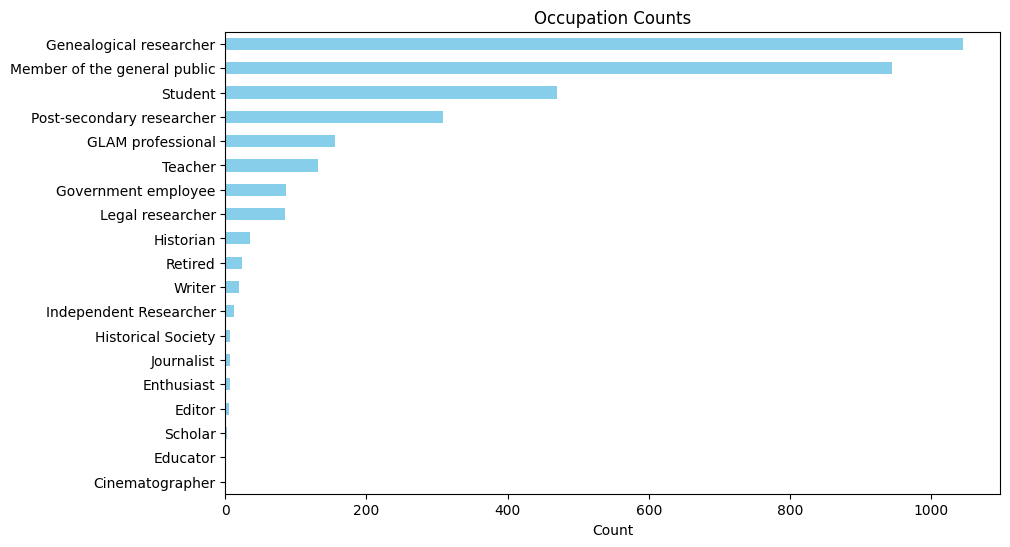

In [172]:
# Now, let's plot a bar chart of the occupation counts
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6)) 
occupation_counts.sort_values().plot(kind='barh', color='skyblue') 
plt.xlabel('Count')
plt.title('Occupation Counts')
plt.show()


> Create a bar chart showing the count of the different interests

In [173]:
# The first step is to get the count of each interest. 
# The interests_columns contains the names of the interests columns in the dataset.
interest_counts = data[interests_columns].sum()

interest_counts.sort_values(ascending=False)

History                     1537
Genealogy                   1183
Indigenous Studies           338
Geography                    259
Education                    207
Law                          193
Indigenous Land Claims       190
Literature                   166
Digital Humanities           163
Political Science            160
Environment/Climate          150
Health                        98
Gender Studies                81
Linguistics                   80
Information Science           79
Computer Science              74
Archaeology/Anthropology       7
Family History                 2
Social Studies                 2
Local History                  1
Religious Studies              1
Social Science                 1
dtype: int64

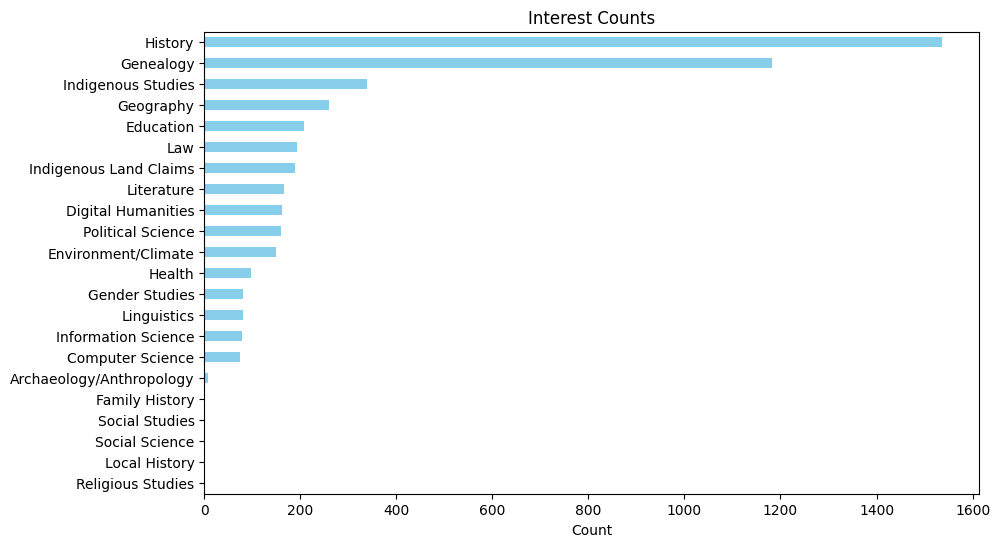

In [174]:
# Now, let's plot a bar chart of the interest counts

plt.figure(figsize=(10,6)) 
interest_counts.sort_values().plot(kind='barh', color='skyblue') 
plt.xlabel('Count')
plt.title('Interest Counts')
plt.show()

> Compare peoples occupation to their interests

In [175]:
# First, let's get a sense of how are occupations related to interests
# For this, I will create a cross-correlation matrix between occupations and interests.
# This matrix will measure the linear relationships between each pair of occupation and interest.
 
# Getting relevant columns
occupations_data = data[occupations_columns]
interests_data = data[interests_columns]

# Concatenating the data
combined_data = pd.concat([occupations_data, interests_data], axis=1)

correlation_matrix = combined_data.corr()

# Selecting only the correlations between occupations and interests
occupation_interest_correlation = correlation_matrix.loc[occupations_columns, interests_columns]

occupation_interest_correlation

,Archaeology/Anthropology,Computer Science,Digital Humanities,Education,Environment/Climate,Family History,Gender Studies,Genealogy,Geography,Health,...,Indigenous Studies,Information Science,Law,Linguistics,Literature,Local History,Political Science,Religious Studies,Social Science,Social Studies
Cinematographer,-0.000899,-0.002957,-0.004458,-0.005064,-0.004267,-0.000480,-0.003097,-0.015088,-0.005719,-0.003417,...,-0.006631,-0.003058,0.069596,-0.003078,-0.004501,-0.000339,0.076894,-0.000339,-0.000339,-0.000480
Editor,-0.002012,-0.006616,0.134305,0.053196,0.065479,-0.001074,0.093930,-0.016940,0.045446,0.084324,...,0.036911,0.044205,0.022415,0.043849,0.061452,-0.000760,0.026509,-0.000760,-0.000760,-0.001074
Educator,-0.000899,-0.002957,-0.004458,0.067031,-0.004267,-0.000480,-0.003097,0.022498,-0.005719,-0.003417,...,-0.006631,-0.003058,-0.004877,-0.003078,-0.004501,-0.000339,-0.004414,-0.000339,-0.000339,-0.000480
Enthusiast,-0.002204,-0.007249,-0.010929,-0.012415,0.023790,-0.001177,-0.007593,-0.006274,0.012568,0.033608,...,-0.016257,-0.007496,-0.011957,-0.007545,-0.011035,-0.000832,0.022400,-0.000832,-0.000832,-0.001177
GLAM professional,-0.011497,0.049627,0.162441,0.048257,0.042262,-0.006140,0.137046,-0.068909,0.002028,0.049559,...,0.043996,0.196180,0.054374,0.026119,0.054520,-0.004341,0.044173,-0.004341,-0.004341,-0.006140
Genealogical researcher,-0.036195,-0.046528,-0.042983,-0.090110,-0.097571,0.007900,-0.090003,0.619350,-0.019859,-0.070338,...,-0.097853,-0.057253,-0.084572,-0.049725,-0.113560,0.024838,-0.080713,-0.013667,-0.013667,-0.019331
Government employee,-0.008460,0.023715,0.090341,0.039123,0.051573,-0.004518,0.032507,-0.043276,0.052989,0.024063,...,0.032496,0.108522,0.133384,0.082688,0.027594,-0.003194,0.083017,-0.003194,-0.003194,-0.004518
Historian,-0.005350,0.022445,0.041988,-0.005619,0.003114,-0.002857,0.000728,-0.032269,0.010222,0.014607,...,-0.000140,-0.018195,-0.003699,-0.018313,-0.013199,-0.002020,0.015203,-0.002020,-0.002020,-0.002857
Historical Society,-0.002381,-0.007831,-0.011807,0.013865,-0.011300,-0.001272,-0.008203,-0.025739,0.009474,-0.009050,...,-0.017563,-0.008098,-0.012917,-0.008151,-0.011921,-0.000899,-0.011691,-0.000899,-0.000899,-0.001272
Independent Researcher,-0.003120,-0.010262,0.054460,0.003276,0.033679,-0.001666,-0.010750,-0.008882,0.036612,0.047578,...,0.060596,-0.010612,0.004612,0.054897,0.053713,-0.001178,0.008195,-0.001178,-0.001178,-0.001666


The above correlation matrix displays the linear relationship between occupations and interests from the DataFrame.

> Create a heat map showing the relationship between occupations and interests

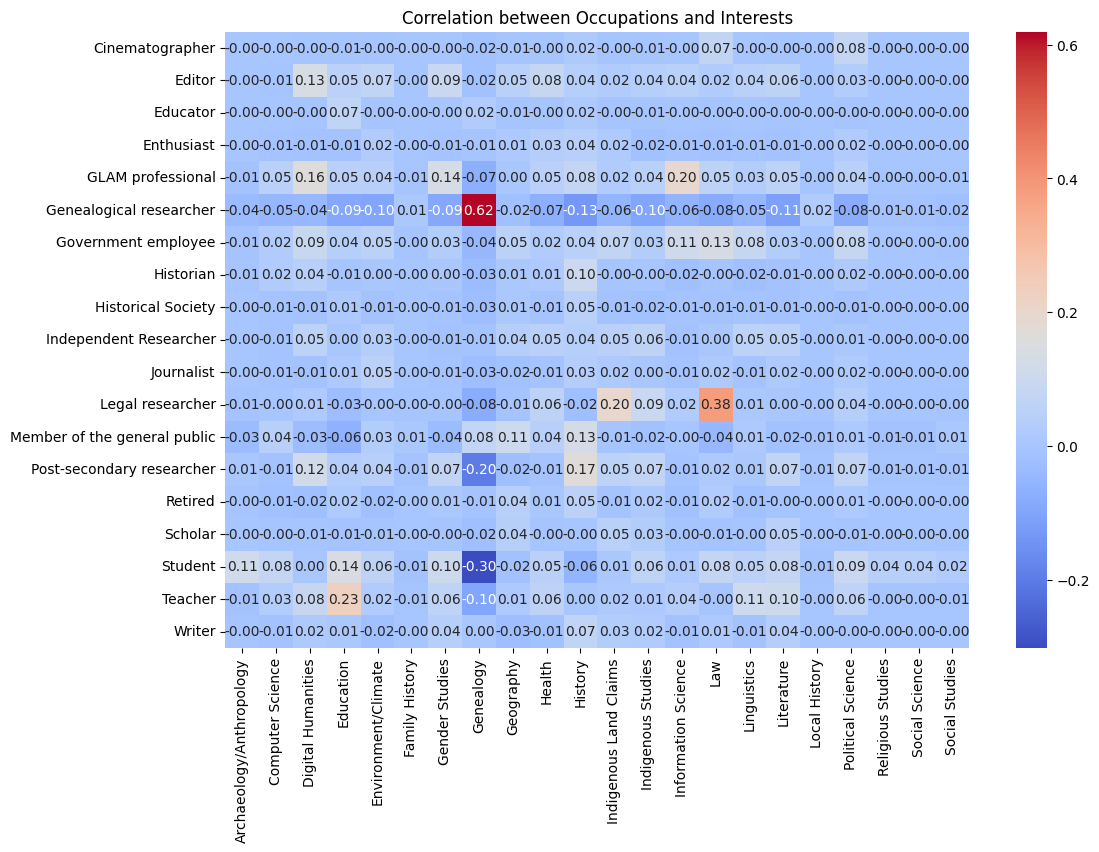

In [176]:
# For visualizing the relationship between occupations and interests, we can create a heatmap using seaborn.
# Heatmap will use the correlation matrix that we computed before.

import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(occupation_interest_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Occupations and Interests')
plt.show()

Legend:
Dark red represent a strong positive relationship between specific occupations and interests. 
Areas that are navy blue represent a strong negative relationship between an occupation and an interest. Areas that are light colored (around zero) represent a weak or no relationship between the variables. 

> plot the entire dataset of people on a map displaying the counts per city

In [177]:
# Now, let's group the data by city and get the count of people in each city
people_counts = data.groupby(['city', 'latitude', 'longitude']).size().reset_index(name='counts')
people_counts

,city,latitude,longitude,counts
0,Aalborg,57.0480,9.9187,1
1,Abbotsford,49.0580,-122.2526,4
2,Acton,42.4851,-71.4328,1
3,Agassiz,49.2330,-121.7693,1
4,Airdrie,51.3001,-114.0353,4
...,...,...,...,...
811,Yellowknife,62.4541,-114.3725,2
812,Youngsville,30.0997,-91.9901,2
813,Zagreb,45.8144,15.9780,1
814,Zanesville,39.9274,-82.0041,1


In [178]:
# Import the folium package
import folium

# Create an initial map, we are going to start with a blank map centered around (0,0)
m = folium.Map(location=[0, 0], zoom_start=1)

# Using folium.Circle, add a cirle for each city in people_counts DataFrame
# The size of the circle corresponds to the count of people in the city
for _, row in people_counts.iterrows():
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=float(row['counts']) * 1000,  # Multiply by 1000 to make the circles visible
        fill=True,
        tooltip=f"{row['city']}: {row['counts']} people"
    ).add_to(m)

# Display the map
m

> what are the most common interests for each occupation in the dataset

In [179]:
# For each occupation, let's find out the most common interest
occupation_interests = {}

for occupation in occupations_columns:
    # Calculate the sum of people with this occupation having each interest
    coi = data[data[occupation] == 1][interests_columns].sum()
    # Find the most common interest
    most_common_interest = coi.idxmax()
    occupation_interests[occupation] = most_common_interest

occupation_interests

{'Cinematographer': 'History',
 'Editor': 'History',
 'Educator': 'Education',
 'Enthusiast': 'History',
 'GLAM professional': 'History',
 'Genealogical researcher': 'Genealogy',
 'Government employee': 'History',
 'Historian': 'History',
 'Historical Society': 'History',
 'Independent Researcher': 'History',
 'Journalist': 'History',
 'Legal researcher': 'Law',
 'Member of the general public': 'History',
 'Post-secondary researcher': 'History',
 'Retired': 'History',
 'Scholar': 'Geography',
 'Student': 'History',
 'Teacher': 'History',
 'Writer': 'History'}

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=78bfc222-b866-4a43-b8a8-c2a8d5467ce5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>